In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
directory='./'

In [3]:
def annot_plot(ax,w,h):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))

In [4]:
match_data=pd.read_csv(directory+'Match.csv')
deliveries_data=pd.read_csv(directory+'Ball_by_Ball.csv')

In [5]:
match_data.head()

,Match_Id,Match_Date,Team_Name_Id,Opponent_Team_Id,Season_Id,Venue_Name,Toss_Winner_Id,Toss_Decision,IS_Superover,IS_Result,Is_DuckWorthLewis,Win_Type,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,First_Umpire_Id,Second_Umpire_Id,City_Name,Host_Country
0,335987,18-Apr-08,2,1,1,M Chinnaswamy Stadium,2,field,0,1,0,by runs,140.0,1.0,2.0,470,477,Bangalore,India
1,335988,19-Apr-08,4,3,1,"Punjab Cricket Association Stadium, Mohali",3,bat,0,1,0,by runs,33.0,3.0,19.0,471,487,Chandigarh,India
2,335989,19-Apr-08,6,5,1,Feroz Shah Kotla,5,bat,0,1,0,by wickets,9.0,6.0,90.0,472,512,Delhi,India
3,335990,20-Apr-08,7,2,1,Wankhede Stadium,7,bat,0,1,0,by wickets,5.0,2.0,11.0,473,476,Mumbai,India
4,335991,20-Apr-08,1,8,1,Eden Gardens,8,bat,0,1,0,by wickets,5.0,1.0,4.0,474,486,Kolkata,India


In [6]:
match_data['win_by']=np.where(match_data['Win_Type']=='by runs','Bat first','Bowl first')

In [7]:
match_data.shape

(577, 20)

In [8]:
deliveries_data.head(5)

,Match_Id,Innings_Id,Over_Id,Ball_Id,Team_Batting_Id,Team_Bowling_Id,Striker_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_dissimal_Id,Dissimal_Type,Fielder_Id
0,335987,1,1,1,1,2,1,1,2,14,0,legbyes,1,,,
1,335987,1,1,2,1,2,2,2,1,14,0,,,,,
2,335987,1,1,3,1,2,2,2,1,14,0,wides,1,,,
3,335987,1,1,4,1,2,2,2,1,14,0,,,,,
4,335987,1,1,5,1,2,2,2,1,14,0,,,,,


In [9]:
deliveries_data['runs']=deliveries_data['Batsman_Scored'].cumsum()

In [10]:
deliveries_data.shape

(136590, 17)

In [11]:
match_data['Match_Date'] = match_data['Match_Date'].str[-2:]

In [12]:
match_data.head(5)

,Match_Id,Match_Date,Team_Name_Id,Opponent_Team_Id,Season_Id,Venue_Name,Toss_Winner_Id,Toss_Decision,IS_Superover,IS_Result,Is_DuckWorthLewis,Win_Type,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,First_Umpire_Id,Second_Umpire_Id,City_Name,Host_Country,win_by
0,335987,08,2,1,1,M Chinnaswamy Stadium,2,field,0,1,0,by runs,140.0,1.0,2.0,470,477,Bangalore,India,Bat first
1,335988,08,4,3,1,"Punjab Cricket Association Stadium, Mohali",3,bat,0,1,0,by runs,33.0,3.0,19.0,471,487,Chandigarh,India,Bat first
2,335989,08,6,5,1,Feroz Shah Kotla,5,bat,0,1,0,by wickets,9.0,6.0,90.0,472,512,Delhi,India,Bowl first
3,335990,08,7,2,1,Wankhede Stadium,7,bat,0,1,0,by wickets,5.0,2.0,11.0,473,476,Mumbai,India,Bowl first
4,335991,08,1,8,1,Eden Gardens,8,bat,0,1,0,by wickets,5.0,1.0,4.0,474,486,Kolkata,India,Bowl first


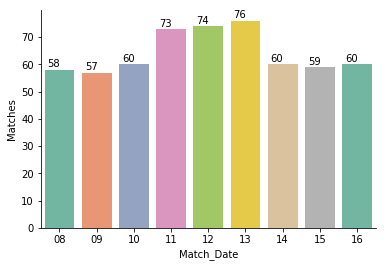

In [13]:
ax=sns.countplot('Match_Date',data=match_data,palette="Set2")
plt.ylabel('Matches')
annot_plot(ax,0.08,1)

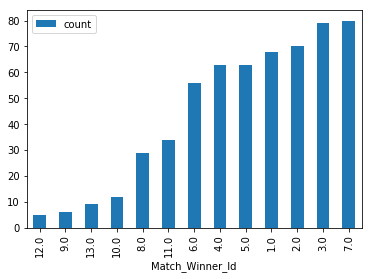

In [69]:
match_data.groupby('Match_Winner_Id')['Match_Winner_Id'].agg(['count']).sort_values('count').reset_index().plot(x='Match_Winner_Id',y='count',kind='bar')

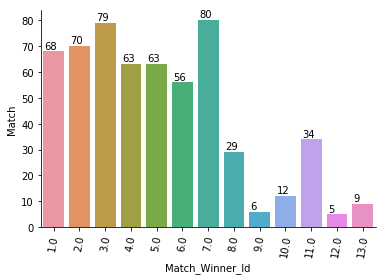

In [15]:
ax=sns.countplot(x='Match_Winner_Id',data=match_data)
plt.ylabel('Match')
plt.xticks(rotation=80)
annot_plot(ax,0.05,1)

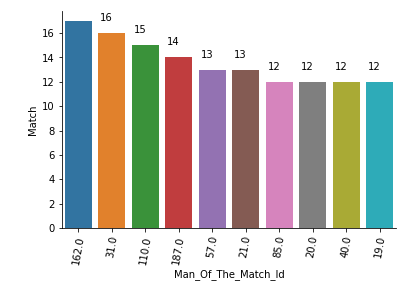

In [75]:
ax=sns.countplot(x='Man_Of_The_Match_Id',data=match_data,order=match_data.Man_Of_The_Match_Id.value_counts().iloc[:10].index)
plt.ylabel('Match')
plt.xticks(rotation=80)
annot_plot(ax,0.05,1)

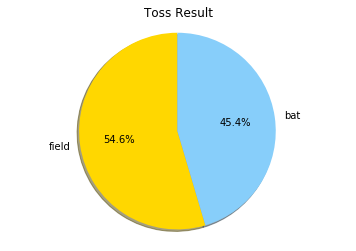

In [71]:
toss=match_data.Toss_Decision.value_counts()
labels=np.array(toss.index)
sizes = toss.values
colors = ['gold', 'lightskyblue']
#explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)

plt.title('Toss Result')
plt.axis('equal')
plt.show()

In [18]:
final_matches=match_data.drop_duplicates(subset=['Match_Date'], keep='last')

final_matches[['Match_Date','Match_Winner_Id']].reset_index(drop=True).sort_values('Match_Date')

,Match_Date,Match_Winner_Id
0,08,5.0
1,09,8.0
2,10,3.0
3,11,3.0
4,12,1.0
5,13,7.0
6,14,1.0
7,15,7.0
8,16,11.0


In [19]:
final_matches['Match_Winner_Id'].value_counts()

7.0     2
1.0     2
3.0     2
11.0    1
8.0     1
5.0     1
Name: Match_Winner_Id, dtype: int64

In [20]:
final_matches[['Match_Winner_Id','Man_Of_The_Match_Id']].reset_index(drop=True)

,Match_Winner_Id,Man_Of_The_Match_Id
0,5.0,31.0
1,8.0,124.0
2,3.0,21.0
3,3.0,185.0
4,1.0,214.0
5,7.0,221.0
6,1.0,96.0
7,7.0,57.0
8,11.0,385.0


In [21]:
len(final_matches[final_matches['Toss_Winner_Id']==final_matches['Match_Winner_Id']]['Match_Winner_Id'])

6

In [22]:
deliveries_data['runs'] = deliveries_data['Batsman_Scored'] + deliveries_data['Extra_Runs']

In [24]:
deliveries_data.head(5)

,Match_Id,Innings_Id,Over_Id,Ball_Id,Team_Batting_Id,Team_Bowling_Id,Striker_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_dissimal_Id,Dissimal_Type,Fielder_Id,runs
0,335987,1,1,1,1,2,1,1,2,14,0,legbyes,1,,,,01
1,335987,1,1,2,1,2,2,2,1,14,0,,,,,,0
2,335987,1,1,3,1,2,2,2,1,14,0,wides,1,,,,01
3,335987,1,1,4,1,2,2,2,1,14,0,,,,,,0
4,335987,1,1,5,1,2,2,2,1,14,0,,,,,,0


In [26]:
match_data['id'] = match_data.index

In [27]:
match_data.head(5)

,Match_Id,Match_Date,Team_Name_Id,Opponent_Team_Id,Season_Id,Venue_Name,Toss_Winner_Id,Toss_Decision,IS_Superover,IS_Result,...,Win_Type,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,First_Umpire_Id,Second_Umpire_Id,City_Name,Host_Country,win_by,id
0,335987,08,2,1,1,M Chinnaswamy Stadium,2,field,0,1,...,by runs,140.0,1.0,2.0,470,477,Bangalore,India,Bat first,0
1,335988,08,4,3,1,"Punjab Cricket Association Stadium, Mohali",3,bat,0,1,...,by runs,33.0,3.0,19.0,471,487,Chandigarh,India,Bat first,1
2,335989,08,6,5,1,Feroz Shah Kotla,5,bat,0,1,...,by wickets,9.0,6.0,90.0,472,512,Delhi,India,Bowl first,2
3,335990,08,7,2,1,Wankhede Stadium,7,bat,0,1,...,by wickets,5.0,2.0,11.0,473,476,Mumbai,India,Bowl first,3
4,335991,08,1,8,1,Eden Gardens,8,bat,0,1,...,by wickets,5.0,1.0,4.0,474,486,Kolkata,India,Bowl first,4


In [31]:
season_data=match_data[['id','Match_Date','Match_Winner_Id']]

In [32]:
complete_data=deliveries_data.merge(season_data,how='inner',left_on='Match_Id',right_on='id')

In [33]:
four_data=complete_data[complete_data['Batsman_Scored']==4]

four_data.groupby('Team_Batting_Id')['Batsman_Scored'].agg({'runs by fours':'sum','fours':'count'})

,runs by fours,fours
Team_Batting_Id,,


In [35]:
fours_and_sixes = deliveries_data.groupby('Batsman_Scored').size()

In [36]:
fours

Batsman_Scored
                 16
0             55874
1             50107
2              8842
3               473
4             15413
5                42
6              5813
Do_nothing       10
dtype: int64

In [37]:
deliveries_data['Batsman_Scored'].value_counts()

0             55874
1             50107
4             15413
2              8842
6              5813
3               473
5                42
                 16
Do_nothing       10
Name: Batsman_Scored, dtype: int64

In [38]:
complete_data.head(5)

,Match_Id,Innings_Id,Over_Id,Ball_Id,Team_Batting_Id,Team_Bowling_Id,Striker_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_dissimal_Id,Dissimal_Type,Fielder_Id,runs,id,Match_Date,Match_Winner_Id


In [51]:
complete_data=pd.merge(deliveries_data,season_data,how='outer',left_on='Match_Id',right_on='id')
# season_data.head(5)
complete_data.head()

,Match_Id,Innings_Id,Over_Id,Ball_Id,Team_Batting_Id,Team_Bowling_Id,Striker_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_dissimal_Id,Dissimal_Type,Fielder_Id,runs,id,Match_Date,Match_Winner_Id
0,335987.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,14.0,0,legbyes,1,,,,01,NaN,NaN,NaN
1,335987.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,14.0,0,,,,,,0,NaN,NaN,NaN
2,335987.0,1.0,1.0,3.0,1.0,2.0,2.0,2.0,1.0,14.0,0,wides,1,,,,01,NaN,NaN,NaN
3,335987.0,1.0,1.0,4.0,1.0,2.0,2.0,2.0,1.0,14.0,0,,,,,,0,NaN,NaN,NaN
4,335987.0,1.0,1.0,5.0,1.0,2.0,2.0,2.0,1.0,14.0,0,,,,,,0,NaN,NaN,NaN


In [45]:
match_data['Match_Winner_Id'].value_counts()

7.0     80
3.0     79
2.0     70
1.0     68
4.0     63
5.0     63
6.0     56
11.0    34
8.0     29
10.0    12
13.0     9
9.0      6
12.0     5
Name: Match_Winner_Id, dtype: int64

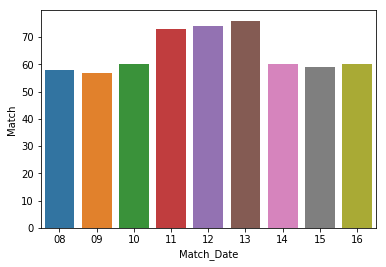

In [77]:
sns.countplot(x='Match_Date', data=match_data)
plt.ylabel('Match')
plt.show()

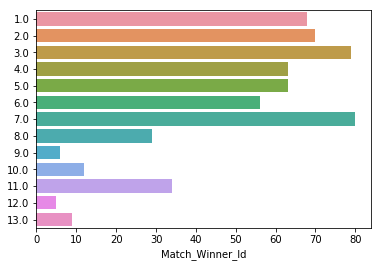

In [53]:
data = match_data.Match_Winner_Id.value_counts()
sns.barplot(y = data.index, x = data, orient='h');

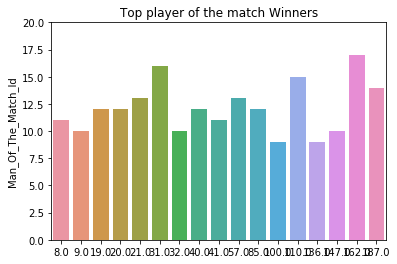

In [59]:
top_players = match_data.Man_Of_The_Match_Id.value_counts()[:100]
#sns.barplot(x="day", y="total_bill", data=tips)
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
#top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v'); #palette="Blues");
plt.show()

In [61]:
ss = match_data['Toss_Winner_Id'] == match_data['Match_Winner_Id']

ss.groupby(ss).size()

False    286
True     291
dtype: int64

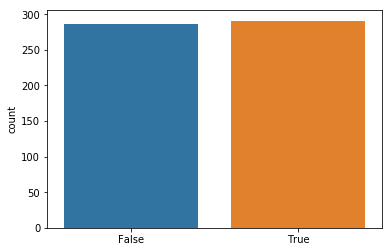

In [62]:
sns.countplot(ss);

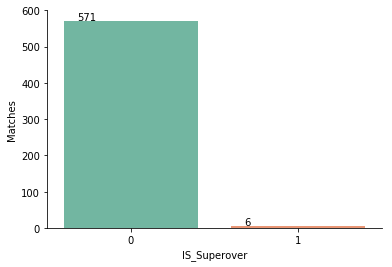

In [63]:
ax=sns.countplot('IS_Superover',data=match_data,palette="Set2")
plt.ylabel('Matches')
annot_plot(ax,0.08,1)


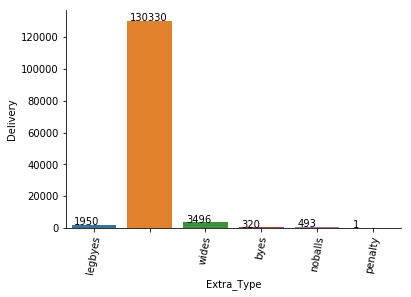

In [64]:
ax=sns.countplot(x='Extra_Type',data=deliveries_data)
plt.ylabel('Delivery')
plt.xticks(rotation=80)
annot_plot(ax,0.05,1)

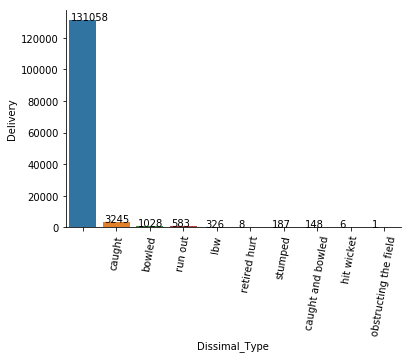

In [66]:
ax=sns.countplot(x='Dissimal_Type',data=deliveries_data)
plt.ylabel('Delivery')
plt.xticks(rotation=80)
annot_plot(ax,0.05,1)